In [120]:
import pandas as pd
import matplotlib.pyplot as plt

###   创建数据   获取数据  处理数据  分析数据  展示数据 

In [16]:
df = pd.read_csv('train_new.csv')

##  数据集有多少条

In [18]:
len(df)

891

## 打印出票价最贵的那条数据

In [19]:
df.Fare = df.Fare.apply(lambda x:x[1:])

In [21]:
df.Fare = df.Fare.astype('float64')

In [23]:
df.Fare.dtype

dtype('float64')

In [24]:
df[df.Fare == df.Fare.max()]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## 试概述此数据集

In [25]:
#列名分别为  未命名的   旅客ID   是否幸存   船舱等级   名字  性别  年龄    兄弟姊妹   父母孩子     船票   票价   船舱号    从哪上的船
# 可以分析出各种因素导致的生存率，这都需要分析得到 ，下面让我们分析一下吧

## 有没有不可以分析的列?试说明原因.如果有,请删除这一列

In [35]:
df.count()

Unnamed: 0     891
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [36]:
#Cabin(船舱号)无法分析   原因：NaN空值太多，不是有效数据
df = df.drop(columns = 'Cabin')

## 有没有名字叫jack的人?

In [43]:
#df[df.Name.str.contains('jack')]
df[df.Name == 'jack']

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


## 人员存活率和登录港口是否有关系

In [98]:
emb =df.groupby(['Embarked','Survived']).count().PassengerId

In [99]:
emb

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

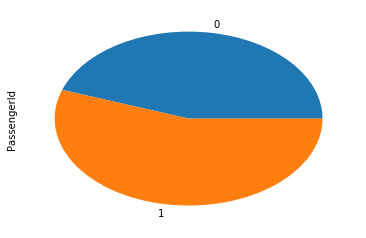

In [101]:
emb.C.plot.pie()   # C港口

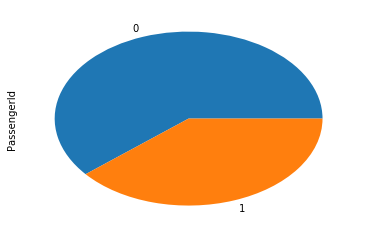

In [102]:
emb.Q.plot.pie()  # Q港口

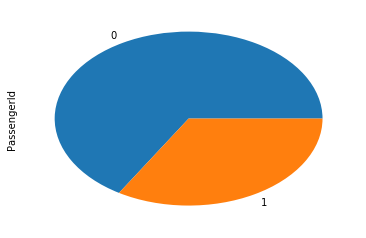

In [103]:
emb.S.plot.pie()  # S港口

## 人员存活率和年龄是否有关系

In [61]:
df1 = df.dropna()   # 删除年龄这一列为空值的行

In [63]:
len(df1)

712

In [70]:
df1.Age = df1.Age.astype('int')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [144]:
df_s = df1[df1.Age <= 18]
df_s_info = df_s.Survived.value_counts()
df_m = df1[(18< df1.Age) & (df1.Age <= 40)]
df_m_info = df_m.Survived.value_counts()
df_l = df1[df1.Age > 40]
df_l_info = df_l.Survived.value_counts()


In [147]:
print('青年存活率')
print(df_s_info[1]/(df_s_info[1]+df_s_info[0]))
print('中年存活率')
print(df_m_info[1]/(df_m_info[1]+df_m_info[0]))
print('老年存活率')
print(df_l_info[1]/(df_l_info[1]+df_l_info[0]))

青年存活率
0.5035971223021583
中年存活率
0.38497652582159625
老年存活率
0.3673469387755102


## 人员存活率和性别是否有关系

In [90]:
info = df1.groupby(['Sex','Survived']).count().PassengerId

In [91]:
info

Sex     Survived
female  0            64
        1           195
male    0           360
        1            93
Name: PassengerId, dtype: int64

#### 女士幸存与死亡数量比例图

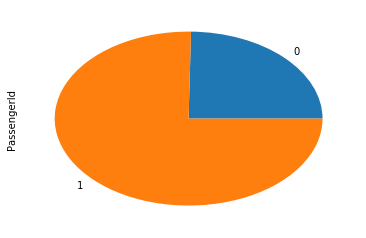

In [92]:
info.female.plot.pie()

#### 男士幸存与死亡数量比例图

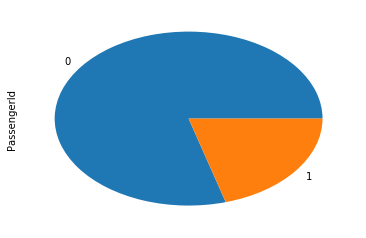

In [93]:
info.male.plot.pie()

In [94]:
# 人员存活率和性别有关系，男士存活率比较低，女士存活率比较高

## 人员存活和旅客类型是否有关系?

In [104]:
pcl = df1.groupby(['Pclass','Survived']).count().PassengerId

In [105]:
pcl

Pclass  Survived
1       0            64
        1           120
2       0            90
        1            83
3       0           270
        1            85
Name: PassengerId, dtype: int64

In [111]:
print('1等舱存活率')
print(pcl[1][1]/(pcl[1][0]+pcl[1][1]))
print('2等舱存活率')
print(pcl[2][1]/(pcl[2][0]+pcl[2][1]))
print('3等舱存活率')
print(pcl[3][1]/(pcl[3][0]+pcl[3][1]))

1等舱存活率
0.6521739130434783
2等舱存活率
0.4797687861271676
3等舱存活率
0.23943661971830985


In [112]:
#  一等舱存活率还是挺高的，有关系

## 船上的人性别比例如何?试画图说明

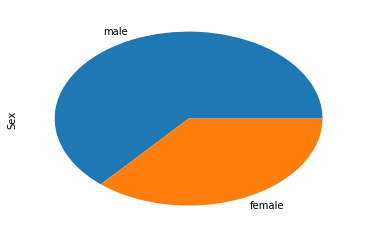

In [118]:
df1.Sex.value_counts().plot.pie()

## 画出票价的散点图,散点图的颜色用性别区分,散点的大小和票价面值成正比

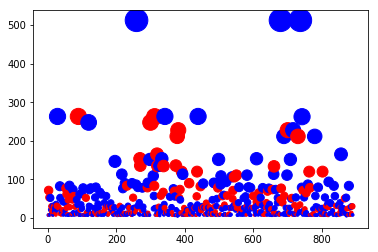

In [137]:
def sex(x):
    if x == 'female':
        return 'r'
    else:
        return 'b'
plt.scatter(df1.PassengerId,df1.Fare,s = df1.Fare,c = df.Sex.apply(lambda x:sex(x)))

## 有人质疑说,妇女儿童生存率高是因为他们更多地在头等舱,这种说法你怎么看,试给出证据

In [158]:
df_f = df1[df1.Sex == 'female']
df_m = df1[df1.Sex == 'male']
df_m_s = df_m[df_m.Age < 7]
df_fs = pd.concat((df_f,df_m_s))

In [162]:
len(df_fs)  #妇女儿童 

283

In [170]:
fs = len(df_fs[df_fs.Pclass == 1]) #妇女儿童在头等舱的人数

In [171]:
zong = len(df1[df1.Pclass == 1]) # 头等舱的总人数

In [173]:
fs/zong  #  妇女儿童在头等舱的比例

0.46195652173913043

In [174]:
#所以说这种看法我不同意